### 1. Import libraries and dataset

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
path = r'/Users/jakubkondelka/Documents/JK_USkillings'

In [12]:
data2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Homicides_cleaned.pkl'))

### 2. Data wrangling

In [17]:
# the Victim Count > 0 represents additional victims. I will replace every value of 0 by value of 1, so that will give me the actual number of victims for those crimes
data2.loc[data2['Victim Count'] == 0, 'Victim Count'] = 1

In [18]:
data2.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,1,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,1,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,1,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,1,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,1,1,FBI


<AxesSubplot:xlabel='Perpetrator Count', ylabel='Count'>

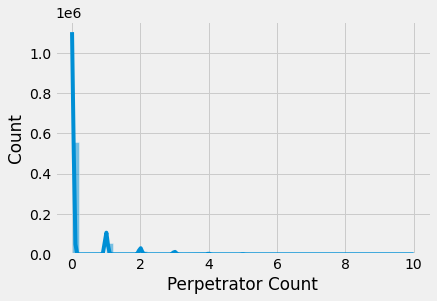

In [19]:
sns.histplot(data2['Perpetrator Count'], bins=50, kde = True) # shows extreme values for 'Victim Count'

In [20]:
data2.loc[data2['Perpetrator Count'] == 0, 'Perpetrator Count'] = 1

<AxesSubplot:xlabel='Perpetrator Count', ylabel='Count'>

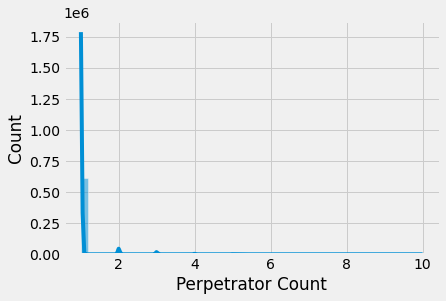

In [21]:
sns.histplot(data2['Perpetrator Count'], bins=50, kde = True)

### 3. Export data

In [22]:
# Export daba to pkl
data2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Homicides_vc1_pc1.pkl'))

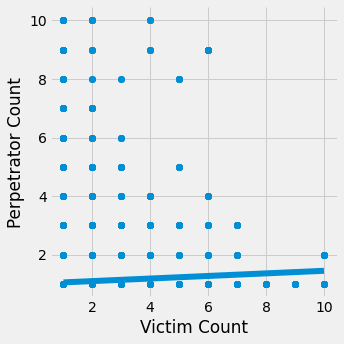

In [23]:
sns.lmplot(x = 'Victim Count', y = 'Perpetrator Count', data = data2)

In [24]:
data2.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Homicides_vc1_pc1.csv'))

In [26]:
data2['Victim Age'].value_counts()

22    23049
20    23031
25    22939
21    22796
23    22438
      ...  
94      116
95       82
97       39
96       37
98       33
Name: Victim Age, Length: 101, dtype: int64